In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Data Generation
===

In [2]:
from numpy.random import rand, randn

In [3]:
n, d, k = 100, 2, 2

In [4]:
np.random.seed(20)
X = rand(n, d)

# means = [rand(d)  for _ in range(k)]  # works for any k
means = [rand(d) * 0.5 + 0.5 , - rand(d)  * 0.5 + 0.5]  # for better plotting when k = 2

S = np.diag(rand(d))

sigmas = [S]*k # we'll use the same Sigma for all clusters for better visual results

print(means)
print(sigmas)

[array([ 0.69872366,  0.75176984]), array([ 0.25997411,  0.14504062])]
[array([[ 0.01764816,  0.        ],
       [ 0.        ,  0.06360523]]), array([[ 0.01764816,  0.        ],
       [ 0.        ,  0.06360523]])]


Solution
===

In [26]:
def compute_log_p(X, mean, sigma):
    d = X.shape[1]
    print(d)
    det = np.linalg.det(sigma)
    print(det)
    log_part = -np.log(np.sqrt(np.power(2*np.pi, d) * det))
    sigma_inv = np.linalg.inv(sigma)
    res = [log_part * -0.5 * (Xn - mean).T.dot(sigma_inv).dot(Xn - mean) for Xn in X ]
    return res
    
compute_log_p(X, means[0], sigmas[0])

2
0.00112251541843


[-0.80084933224905075,
 -1.6914111552206312,
 -19.43990380293392,
 -5.1882948049165618,
 -3.8862201551111948,
 -8.0403559075050843,
 -0.4325619394783628,
 -6.5223986711506994,
 -14.955072147576303,
 -12.346555592196339,
 -1.5949529113090681,
 -4.8506206429926744,
 -1.0500183463876798,
 -0.29523975884965825,
 -3.2832170929322948,
 -0.14137893065514165,
 -13.898278999072428,
 -1.1316302320853155,
 -6.7401175413484324,
 -10.742303083886416,
 -0.6905615941297707,
 -7.9401072446471588,
 -8.9279570694926242,
 -13.024157164065638,
 -5.0551654378678945,
 -1.4980344640542667,
 -0.31566386709954974,
 -0.64837606893280719,
 -0.18730772299319448,
 -3.9873215459046394,
 -7.9779503225663442,
 -0.21519155243699706,
 -1.3230989057138873,
 -7.0806335195446817,
 -6.3432535694430729,
 -0.65612249876541351,
 -1.8331289339268002,
 -5.5604225562353982,
 -1.4014273100599901,
 -8.4331722563414235,
 -18.723258878158465,
 -11.252338496341538,
 -10.14002582584798,
 -4.7379961118932989,
 -20.361200414547053,
 -0.

In [27]:
log_ps = [compute_log_p(X, m, s) for m, s in zip(means, sigmas)]  # exercise: try to do this without looping

2
0.00112251541843
2
0.00112251541843


In [28]:
assignments = np.argmax(log_ps, axis=0)
print(assignments)

[0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0
 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1
 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0]


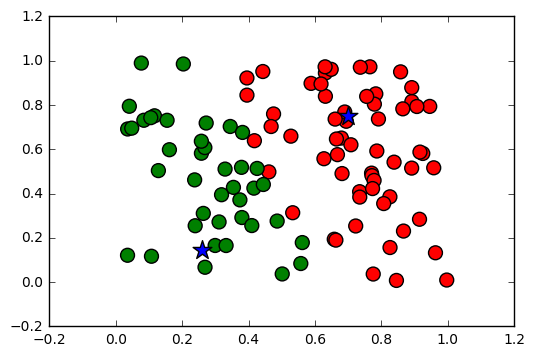

In [29]:
colors = np.array(['red', 'green'])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker='*', s=200)